# Donovan Feist; u0924825; CH EN 2450

# Homework 7: Numerical Differentiation and Integration

## Problem 1

The amount of energy required to change a compound from temperature $T_1$ to $T_2$ at constant pressure can
be written as $q =\int_{T_1}^{T_2} c_pdT$
where q is the required energy and cp is the compound’s heat capacity, which is a function of temperature.

### Part 1

Using the data for $c_p(T)$ from Table 1, determine how much energy is required to heat one kg
of $CO_2$, steel and graphite from $T_1 = 400 K$ to $T_2 = 1000 K$. Do this using the Trapezoid rule (implement your own). You may use Python’s trapz functions to check your results, but you must
implement your own version of this. Submit a brief report or a Jupyter Notebook describing how
you solve the problem (with appropriate equations) and with a table summarizing the heat required
for each compound.

In [158]:
import numpy as np

T1=np.array([400,450,500,550,600,650,700,750,800,850,900,950,1000]) #array of temperature data that corresponds to the CO2 data
T2=np.array([400,600,800,1000]) #array of temperature data that corresponds to the Cp data for steel and graphite
cc=np.array([.942,.981,1.02,1.05,1.08,1.10,1.13,1.15,1.17,1.187,1.204,.220,1.234]) #array of Cp data for CO2
cs=np.array([487,559,685,1169]) #array of Cp data for steel
cg=np.array([992,1406,1650,1793]) #array of Cp data for graphite

In [159]:
#defining my custom made function for using the trapezoid rule
def trap(x,y):
    q=0
    for i in range(0,len(x)-1):
        q+=(x[i+1]-x[i])/2*(y[i]+y[i+1])
    print(q,"kJ")

In [160]:
#executing the trapezoid rule to determine the energy required to heat CO2
trap(T1,cc)
#checking results
c=np.trapz(cc,T1)
print(c, "kJ")

619.0000000000001 kJ
619.0000000000001 kJ


In [161]:
#executing the trapezoid rule to determine the energy required to heat steel
trap(T2,cs)
#checking results
c=np.trapz(cs,T2)
print(c, "kJ")

414400.0 kJ
414400.0 kJ


In [162]:
#executing the trapezoid rule to determine the energy required to heat graphite
trap(T2,cg)
#checking results
c=np.trapz(cg,T2)
print(c, "kJ")

889700.0 kJ
889700.0 kJ


The energy required to heat $CO_2$, steel and graphite from $400K$ to $1000K$ is given in the following table:

| compound:            | CO2 | steel  | graphite |
|----------------------|-----|--------|----------|
| energy required (kJ):| 619 | 414400 | 889700   |

I solved the problem of using the trapezoid rule for numerical integration by first putting the available data into numpy arrays so that functions and equations could then be used to manipulate that data. Because more data was available for the $CO_2$ than was available for the steel and graphite, I had to make two separate temperature arrays. I then defined a function "trap" which would be my own method of using the trapezoid rule. Within the function "trap", I started the energy required "q" at zero, and used a for loop to loop through the data for each interval $\Delta x$. After each iteration of the loop, the energy required for each $\Delta x$ would be added to the total energy required q. After each interval had been looped through, my function printed the final calculated value. I then used numpy's built in trapezoid rule "np.trapz(y,x)" to double check my calculated answers. In all three cases, my funcion and the built in np.trapz(y,x) function yielded the same value.

## Problem 2

In this problem, you will explore the effect of the spacing, h, and the order of accuracy of a few numerical
differentiation approximations we discussed in class. Consider the function
$f (x) = \sin(x)\exp(-x/20)$.

### Part 1

Plot the absolute true error, $|E_t|$, in $f'(2)$ as a function of h for the following approximations to $f'(x)$:

1) First-order forward difference, $f'(x_i) \approx \frac{f(x_{i+1})-f(x_i)}{h}$

2) First-order backward difference, $f'(x_i) \approx \frac{f(x_i)-f(x_{i-1})}{h}$

3) Second-order forward difference, $f'(x_i) \approx \frac{-3f(x_i)+4f(x_{i+1})-f(x_{i+2})}{2h}$

4) Second order central difference, $f'(x_i) \approx \frac{f(x_{i+1})-f(x_{i-1})}{2h}$

5) Fourth-order central difference, $f'(x_i) \approx \frac{\frac{1}{4}f(x_{i-2})-2f(x_{i-1})+2f(x_{i+1})-\frac{1}{4}f(x_{i+2})}{3h}$

Use spacings from $h = 10$ to $h = 10^{-5}$, with choices for h spaced logarithmically over that range
(h=np.logspace(1,-5)). You should measure the error in $f'(2)$ by comparing to the analytic derivative.
Your plot should show $|E_t|$ versus $h$ on a loglog plot, (plt.loglog($h,|E_t|$)),where $|E_t|$ is the absolute true
error. Discuss your findings. Recall that $x_{i+k} = x_i+kh$. For example: $x_{i+1} = x_i+h$, $x_{i+2} = x_i+2h$.

#### First-order forward difference

In [163]:
x=2 # the value to be differentiated around
h=np.logspace(1,-5) #spacing for h
#defining a function, f, that can be used to evaulate f(x) at x and at values of x+ih
def f(x,i):
    # x is the vale being derived around
    # i is the number of steps, h, that are taken from the original value of x (steps to the lefts are represented by negative i values)
    f=np.sin(x+i*h)*np.exp(-(x+i*h)/20)
    return f
true=np.sin(x)*np.exp(-x/20)*(-1/20)+np.exp(-x/20)*np.cos(x) # the analytical derivative of the function f(x)

In [164]:
approx=(f(2,1)-f(2,0))/h #find approximate values for the derivative of f(x) using different values of h
error1=abs(true-approx) # calculating the absolute value of the true error between the true value of the derivative of f(2) and the many approximate values of f(2)

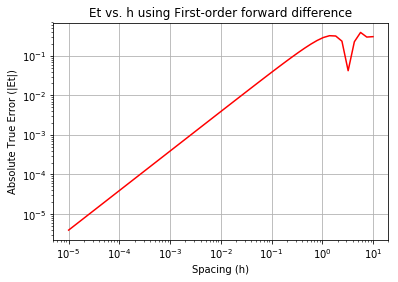

In [165]:
import matplotlib.pyplot as plt
plt.loglog(h,error1,c="red")
plt.title("Et vs. h using First-order forward difference")
plt.xlabel("Spacing (h)")
plt.ylabel("Absolute True Error (|Et|)")
plt.grid(True,which="major") # turn on major grid axes
plt.show()

#### First-order backward difference

In [166]:
approx=(f(2,0)-f(2,-1))/h #find approximate values for the derivative of f(x) using different values of h
error2=abs(true-approx) # calculating the absolute value of the true error between the true value of the derivative of f(2) and the many approximate values of f(2)

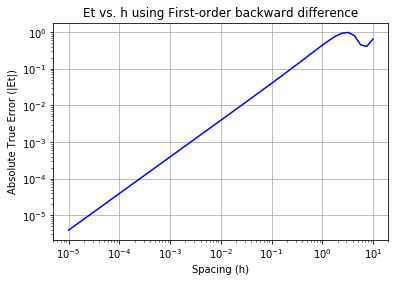

In [167]:
plt.loglog(h,error2,c="blue")
plt.title("Et vs. h using First-order backward difference")
plt.xlabel("Spacing (h)")
plt.ylabel("Absolute True Error (|Et|)")
plt.grid(True,which="major") # turn on major grid axes
plt.show()

#### Second-order forward difference

In [168]:
approx=(-3*f(2,0)+4*f(2,1)-f(2,2))/(2*h) #find approximate values for the derivative of f(x) using different values of h
error3=abs(true-approx) # calculating the absolute value of the true error between the true value of the derivative of f(2) and the many approximate values of f(2)

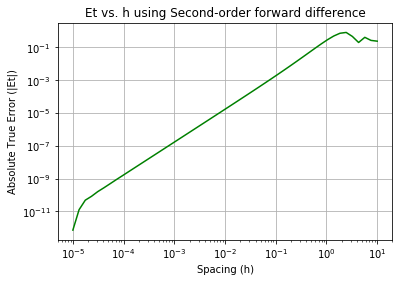

In [169]:
plt.loglog(h,error3,c="green")
plt.title("Et vs. h using Second-order forward difference")
plt.xlabel("Spacing (h)")
plt.ylabel("Absolute True Error (|Et|)")
plt.grid(True,which="major") # turn on major grid axes
plt.show()

#### Second-order central difference

In [170]:
approx=(f(2,1)-f(2,-1))/(2*h) #find approximate values for the derivative of f(x) using different values of h
error4=abs(true-approx) # calculating the absolute value of the true error between the true value of the derivative of f(2) and the many approximate values of f(2)

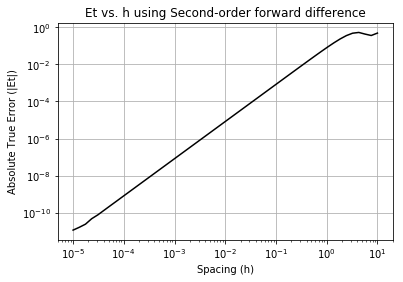

In [171]:
plt.loglog(h,error4,c="black")
plt.title("Et vs. h using Second-order forward difference")
plt.xlabel("Spacing (h)")
plt.ylabel("Absolute True Error (|Et|)")
plt.grid(True,which="major") # turn on major grid axes
plt.show()

#### Fourth-order central difference

In [172]:
approx=(1/4*f(2,-2)-2*f(2,-1)+2*f(2,1)-1/4*f(2,2))/(3*h) #find approximate values for the derivative of f(x) using different values of h
error5=abs(true-approx) # calculating the absolute value of the true error between the true value of the derivative of f(2) and the many approximate values of f(2)

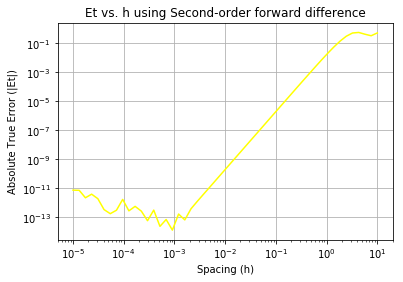

In [173]:
plt.loglog(h,error5,c="yellow")
plt.title("Et vs. h using Second-order forward difference")
plt.xlabel("Spacing (h)")
plt.ylabel("Absolute True Error (|Et|)")
plt.grid(True,which="major") # turn on major grid axes
plt.show()

In [174]:
plt.loglog(h,error1,c="red", label="first-order forward difference")
plt.loglog(h,error2,c="blue", label="first-order backward difference")
plt.loglog(h,error3,c="green", label="second-order forward difference")
plt.loglog(h,error4,c="black", label="second-order central difference")
plt.loglog(h,error5,c="yellow", label="fourth-order central difference")
plt.legend()
plt.title("Et vs. h using Second-order forward difference")
plt.xlabel("Spacing (h)")
plt.ylabel("Absolute True Error (|Et|)")
plt.grid(True,which="major") # turn on major grid axes

#### Summary and Discussion

Plotting the absolute true error data for all five methods on one graph yields:

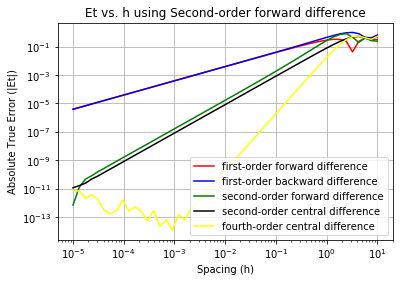

In [175]:
plt.show()

In this discussion I will replace the names of each method with the color representing that method in the graph above.

The finding that is least surprising is that when h is large (on the order of 1 or 10) the absolute true error is greatest. This is true for all five methods used in this assignment. 

Unsurprisingly, the smaller h gets, the smaller the absolute true error gets, with some interesting exceptions near the values $h\approx 10^{-5}$ and $h\approx 10^1$.

All the lines have at an exponential nature to them. This is known because When plotted on an exponential graph, all the lines can be seen as lines with a constant slope for most of the line.

The yellow line, unsurpisingly, has the smallest error for the majority of the h spectrum.

The red and blue lines are indistinguishable for most of the graph, indicating that more most values of h, the red and blue methods perform equally well.

There are some interesting anomolies.

All of the lines show a departure from their exponential nature when $10^0\leq h \leq10^1$. A potential explanation for this is that when $h\approx 1$ or smaller, the changing errors between each change of h is sufficiently small that it gets drowned out by the general direction of the changing error, namely that it is decreasing exponentially.

The green line had greater error than the black line in nearly all places except when h is nearing the value of $10^{-5}$. Near that point, the green line takes a sharp turn downwards, meaning it has less error. A potential explanation for this observation is that once the step-size, h, gets sufficiently small, the green method actually becomes better than the black method.

The yellow line has a good deal of relative maximums and minimums when $10^{-5}\leq h \leq10^{-3}$. This may be an indication that when the step-size, h, is too small, the yellow method becomes unstable and begins to introduce more error into the approximation. Changing the exponent of smallest boundary of the h values from -5 to more negative numbers (such as -6, -9, or -12) supports this hypothesis.

An interesting finding is that not only does the yellow line become inconsistent once h is sufficiently small, but all the lines seem to reach their own limit where the depart from an exponential line and become erratic. The h value appears to be unique to each method. Even more interestingly, after each method has reached its unique "small value" for h, all five methods seems to accumulate error at a similar rate. Changing the exponent of smallest boundary of the h to -12 makes this very obvious.

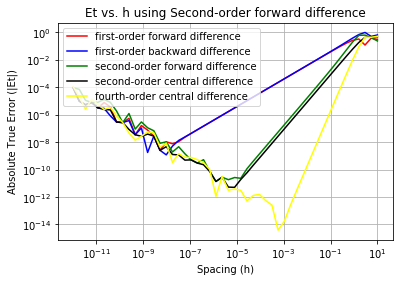

In [179]:
h=np.logspace(1,-12)
#first-order forward difference
approx=(f(2,1)-f(2,0))/h
error1=abs(true-approx)
#first-order backward difference
approx=(f(2,0)-f(2,-1))/h
error2=abs(true-approx)
#second-order forward difference
approx=(-3*f(2,0)+4*f(2,1)-f(2,2))/(2*h)
error3=abs(true-approx)
#second-order central difference
approx=(f(2,1)-f(2,-1))/(2*h)
error4=abs(true-approx)
#fourth-order central difference
approx=(1/4*f(2,-2)-2*f(2,-1)+2*f(2,1)-1/4*f(2,2))/(3*h)
error5=abs(true-approx)
#plot the lines
plt.loglog(h,error1,c="red", label="first-order forward difference")
plt.loglog(h,error2,c="blue", label="first-order backward difference")
plt.loglog(h,error3,c="green", label="second-order forward difference")
plt.loglog(h,error4,c="black", label="second-order central difference")
plt.loglog(h,error5,c="yellow", label="fourth-order central difference")
plt.legend()
plt.title("Et vs. h using Second-order forward difference")
plt.xlabel("Spacing (h)")
plt.ylabel("Absolute True Error (|Et|)")
plt.grid(True,which="major") # turn on major grid axes
plt.show()